In [2]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
sample_text = """
LangGraph is an open-source, graph-based framework built by LangChain to design, manage, and execute complex, stateful AI agent workflows.  It enables developers to create multi-step, loopable, and branching AI systems by modeling agent logic as interconnected nodes (individual steps or functions) and edges (transitions between steps based on state).  Unlike traditional linear workflows, LangGraph supports cyclical execution, persistent state management, and human-in-the-loop interactions, making it ideal for advanced agentic AI applications like multi-agent systems, dynamic chatbots, and complex decision-making pipelines. 

Key features include:

Graph-based architecture: Treats workflows as directed graphs with nodes and edges, allowing flexible control flow. 
Stateful execution: Maintains and updates a shared state across all nodes, enabling context-aware, long-running agents. 
Support for loops and conditions: Handles iterative processes, retries, and branching logic natively. 
High observability: Integrates with tools like LangSmith for debugging and monitoring agent behavior.
Modular and extensible: Can work independently or alongside LangChain components, though it's often used in tandem. 
LangGraph is free and open-source under the MIT license, suitable for both beginners and advanced users building scalable, production-ready AI agents.
"""

In [4]:
from typing import TypedDict
class SummaryState(TypedDict, total = False):
    text: str
    summary: str
    refined: str

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-120b")

In [6]:
def summarise(state: SummaryState):
    prompt = f"Summarize the text into 3 sentences: \n\n {state['text']}"
    response = llm.invoke(prompt)
    return {
        'summary': response
    }

def refine(state: SummaryState):
    prompt = f"Improve the clarity and readability of this summary: \n\n {state['summary']}"
    response = llm.invoke(prompt)
    return {
        'refined': response
    }

In [ ]:
from langgraph.graph import START, END, StateGraph
graph = StateGraph(SummaryState)
graph.add_node('summarize',summarise)
graph.add_node('refined',refine)

graph.add_edge(START,'summarize')
graph.add_edge('summarize','refined')
graph.add_edge('refined',END)

graph_builder = graph.compile()

In [10]:
res = graph_builder.invoke({
    'text': sample_text
})

In [11]:
res['summary'].pretty_print()

================================== Ai Message ==================================

LangGraph, an open‑source framework from LangChain, lets developers model AI agent workflows as directed graphs of nodes (steps) and edges (state‑based transitions), enabling multi‑step, loopable, and branching execution. Its core features include persistent shared state across nodes, native support for loops, conditions, and human‑in‑the‑loop interactions, plus high observability through tools like LangSmith. As a modular, MIT‑licensed library, LangGraph works independently or with LangChain to build scalable, production‑ready multi‑agent systems, dynamic chatbots, and complex decision‑making pipelines.


In [13]:
res['refined'].pretty_print()

================================== Ai Message ==================================

LangGraph is an open‑source, MIT‑licensed framework from LangChain that lets developers represent AI agent workflows as directed graphs, with nodes for steps and edges for state‑driven transitions. It provides built‑in support for persistent shared state, loops, conditional branches, and human‑in‑the‑loop interactions, while offering strong observability through tools like LangSmith. Because it works both independently and alongside LangChain, LangGraph enables the rapid creation of scalable, production‑ready multi‑agent systems, dynamic chatbots, and complex decision‑making pipelines.


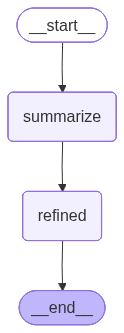

In [15]:
from IPython.display import Image, display, Markdown

code = graph_builder.get_graph().draw_mermaid()

display(
   Image(
       graph_builder.get_graph().draw_mermaid_png()
   )
)